# Libraries

In [4]:
from wordcloud import WordCloud

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline
from matplotlib.gridspec import GridSpec

from bs4 import BeautifulSoup

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from nltk.stem import 	WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Read data

In [7]:
stackoverflow = pd.read_csv('/QueryResults1.csv')

In [8]:
stackoverflow2 = pd.read_csv('//QueryResults2.csv')

In [9]:
stackoverflow3 = pd.read_csv('/QueryResults3.csv')

In [10]:
stackoverflow4 = pd.read_csv('/QueryResults4.csv')

In [11]:
stackoverflow5 = pd.read_csv('/QueryResults5.csv')

In [12]:
stack = pd.concat([stackoverflow, stackoverflow2, stackoverflow3, stackoverflow4, stackoverflow5], axis=0)

# EDA + Cleaning

In [13]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount
0,1764970,1770683.0,113,143104,<p>Can linq somehow be used to find the index ...,Find index of a value in an array,<c#><arrays><linq>,8,17.0
1,3585,3601.0,132,147579,<p>I want to create my Rails application with ...,Create a new Ruby on Rails application using M...,<mysql><ruby-on-rails><ruby>,19,44.0
2,8692,NaN,229,296787,<p>What are the libraries that support XPath? ...,How to use XPath in Python?,<python><xml><dom><xpath><python-2.x>,12,74.0
3,3713,3777.0,140,284586,<p>I'm writing a web page in ASP.NET. I have s...,Call ASP.NET function from JavaScript?,<javascript><c#><asp.net><onclick>,20,41.0
4,3748,NaN,415,655648,<p>So I'm using an app that stores images heav...,Storing Images in DB - Yea or Nay?,<database><image><theory><storage><blob>,56,880.0


In [14]:
stack.describe()

,id,AcceptedAnswerId,Score,ViewCount,AnswerCount,FavoriteCount
count,1.428920e+05,1.241840e+05,142892.000000,1.428920e+05,142892.000000,142858.000000
mean,1.254441e+07,1.324966e+07,191.511967,1.823023e+05,9.390099,59.009625
std,1.297325e+07,1.345424e+07,353.086972,2.737549e+05,8.484979,153.149253
min,4.000000e+00,7.000000e+00,51.000000,5.660000e+02,0.000000,0.000000
25%,2.533298e+06,2.771701e+06,72.000000,5.380100e+04,4.000000,17.000000
50%,7.684378e+06,8.380238e+06,115.000000,1.053300e+05,7.000000,31.000000
75%,1.871693e+07,1.963743e+07,188.000000,2.082770e+05,12.000000,58.000000
max,6.530330e+07,6.493439e+07,25113.000000,9.137293e+06,518.000000,11205.000000


In [15]:
stack = stack.reset_index().drop('index', axis=1)

## Tags

In [304]:
stack['Tag_c'] = stack['Tags'].str.lower().apply(lambda x : x.split('><'))

In [305]:
t = stack['Tag_c'].apply(lambda x : pd.Series(x).str.replace('<', '').str.replace('>', '').str.replace('-', ' ')).replace(np.nan, '').values.tolist()

In [307]:
txt = "c# billion dollars; we don't own an ounce C++"
tokens = word_tokenize(txt)

mwtokenizer = nltk.MWETokenizer(separator='')
mwtokenizer.add_mwe(('c', '#'))
mwtokenizer.tokenize(tokens)

['c#',
 'billion',
 'dollars',
 ';',
 'we',
 'do',
 "n't",
 'own',
 'an',
 'ounce',
 'C++']

In [308]:
# function take list and return list without digits
def clean_digit_list(list1):
  list2=[]
  for e in list1:
    string1 = ''
    for ee in mwtokenizer.tokenize(word_tokenize(e)): # avoid tokenize c#
      if (any(chr.isdigit() for chr in ee)==False) and (ee not in stop_words):
        string1 = string1 + ' ' +ee
    if string1 != '':
      list2.append(string1.strip())
  return list2

In [309]:
clean_digit_list(['c#', 'ruby on rails'])

['c#', 'ruby rails']

In [310]:
t1 = pd.Series(t).apply(clean_digit_list)

In [311]:
# %timeit
list_tag=[]
for l in t1:
  for e in l:
    if len(e)>0:
      list_tag.append(e)

In [312]:
len(set(list_tag))

12932

In [461]:
pd.Series(list_tag).value_counts()[:50]

python               15416
javascript           14277
java                 13619
c#                   11317
android               9576
html                  6091
c++                   5677
git                   5121
jquery                4975
css                   4952
.net                  4952
ios                   4802
php                   4590
sql                   3407
string                3245
sql server            3089
visual studio         2929
mysql                 2837
node.js               2729
c                     2715
ruby rails            2635
bash                  2375
objective c           2366
linux                 2362
arrays                2342
ruby                  2174
asp.net mvc           2151
swift                 2000
iphone                1885
json                  1802
windows               1747
r                     1686
xcode                 1606
asp.net               1590
django                1585
angularjs             1574
regex                 1473
s

In [315]:
tag_ngrams = []
for tag in pd.Series(list_tag).value_counts()[:400].index:
  count = len(word_tokenize(str(tag)))
  tag_ngrams.append(count)

In [316]:
pd.Series(tag_ngrams).value_counts()

1    315
2     80
3      5
dtype: int64

Only 5 3-grams tags among the top 400

Take all single words in top_400_tags and save them in a list

In [470]:
single_word_top_400_tags = []
list1 = pd.Series(pd.Series(list_tag).value_counts()[:400].index).apply(lambda x: x.split())
for l in list1:
  for e in l:
    single_word_top_400_tags.append(e)
len(set(single_word_top_400_tags))

413

In [286]:
top_400_tags = list(pd.Series(list_tag).value_counts()[:400].index)
# top_400_tags

In [318]:
t1

0                                        [c#, arrays, linq]
1                                 [mysql, ruby rails, ruby]
2                         [python, xml, dom, xpath, python]
3                        [javascript, c#, asp.net, onclick]
4                  [database, image, theory, storage, blob]
                                ...                        
142887                [javascript, jquery, dom, attr, prop]
142888                                        [bash, alias]
142889                                                [git]
142890    [nginx, docker, reverse proxy, docker networking]
142891                    [java, macos, java, installation]
Length: 142892, dtype: object

In [329]:
stack['Tags_c'] = pd.Series(t1)
stack[['Tags', 'Tags_c']][20:30]

,Tags,Tags_c
20,<sql><sql-server><database><performance>,"[sql, sql server, database, performance]"
21,<uml><class-design><diagram>,"[uml, class design, diagram]"
22,<java><xml><binary><binary-data>,"[java, xml, binary, binary data]"
23,<javascript><object><key>,"[javascript, object, key]"
24,<sql-server><tsql><duplicates>,"[sql server, tsql, duplicates]"
25,<ajax><webserver><comet>,"[ajax, webserver, comet]"
26,<python><command-line><command-line-arguments>,"[python, command line, command line arguments]"
27,<javascript><command-line-interface><pretty-pr...,"[javascript, command line interface, pretty pr..."
28,<ios><arrays><swift>,"[ios, arrays, swift]"
29,<mysql><database><performance><innodb><myisam>,"[mysql, database, performance, innodb, myisam]"


Count the occurence of each tag.

In [331]:
tags = {}
for i in range(len(stack)):
  for j in range(len(stack['Tags_c'][i])):
    if stack['Tags_c'][i][j] in tags.keys():
      tags[stack['Tags_c'][i][j]] += 1
    else:
      tags[stack['Tags_c'][i][j]] = 1

In [337]:
tags_sorted = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1])}
list(tags_sorted.items())[-10:]

[('css', 4952),
 ('jquery', 4975),
 ('git', 5121),
 ('c++', 5677),
 ('html', 6091),
 ('android', 9576),
 ('c#', 11317),
 ('java', 13619),
 ('javascript', 14277),
 ('python', 15416)]

**Top 20 tags:**

Text(0.5, 1.0, 'Top 20 tags')

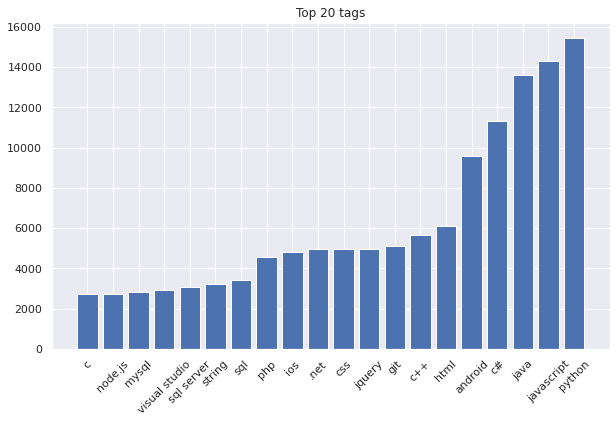

In [338]:
plt.figure(figsize=(10, 6)) 
plt.bar(dict(list(tags_sorted.items())[-20:]).keys(), dict(list(tags_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 tags')

Count number of tags for each question

In [352]:
stack['Tags_count'] = stack['Tags_c'].apply(lambda x: len(x))

In [354]:
stack['Tags_count'].value_counts()

3    43031
2    38057
4    29574
5    17168
1    14965
0       97
Name: Tags_count, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


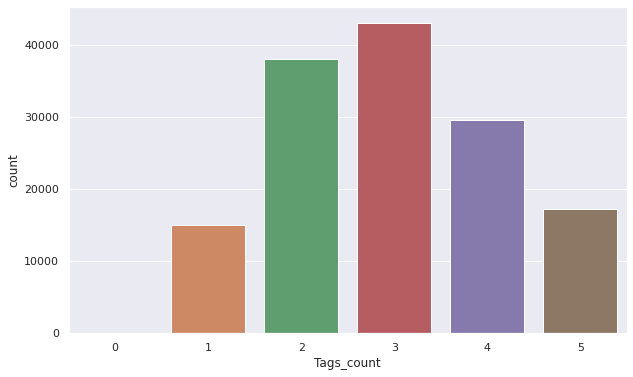

In [353]:
plt.figure(figsize=(10,6))
sns.countplot(stack['Tags_count'])

From the countplot above we can say that:
  - number of tags is comprised between 0 and 5
  - 3 tags questions are the most represented within this dataset

In [339]:
text = stack['Tags_c'].apply(lambda x: ' '.join(x))
text = ' '.join(t for t in text)
text

Output hidden; open in https://colab.research.google.com to view.

In [346]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", regexp=r"(?u)\b\w+\b").generate(text)
# regex expression modified to include single letter words sucs as 'c' or 'r'

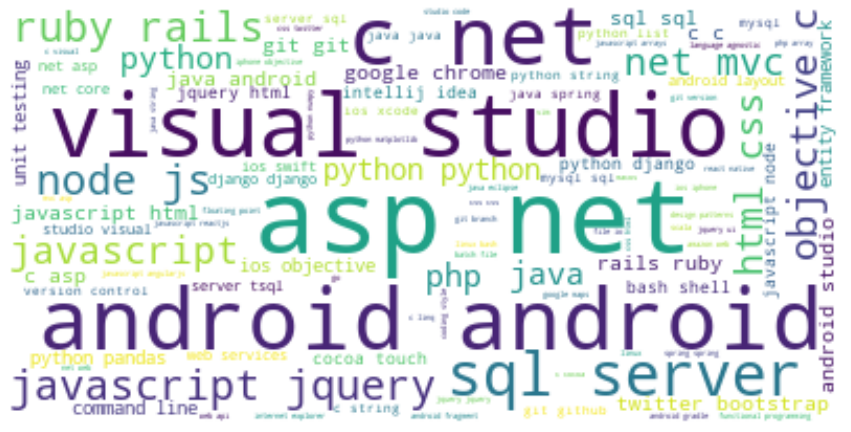

In [347]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualizations

Count the number of characters in body and title

In [356]:
stack['Body_length'] = stack['Body'].apply(lambda x: len(''.join(x.split())))
stack['Title_length'] = stack['Title'].apply(lambda x: len(''.join(x.split())))

**Body length distribution**

Text(0.5, 1.0, 'Body length distribution')

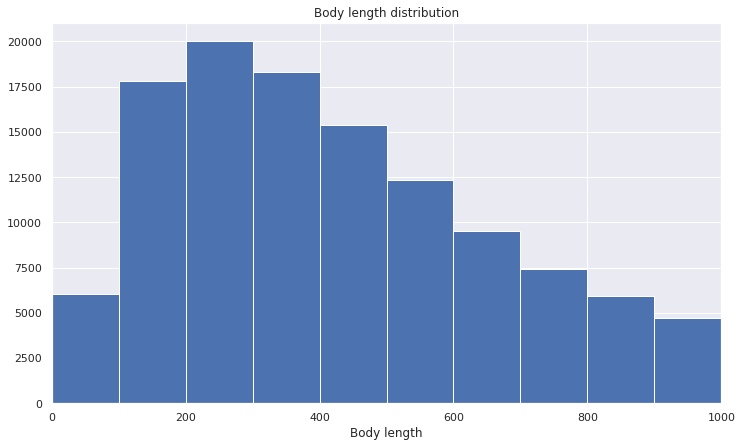

In [359]:
plt.figure(figsize=(12,7))
plt.hist(stack['Body_length'], bins=[i for i in range(0,30000,100)])
plt.xlim(0,1000)
plt.xlabel('Body length')
plt.title('Body length distribution')

**Title length distribution**

Text(0.5, 1.0, 'Title length distribution')

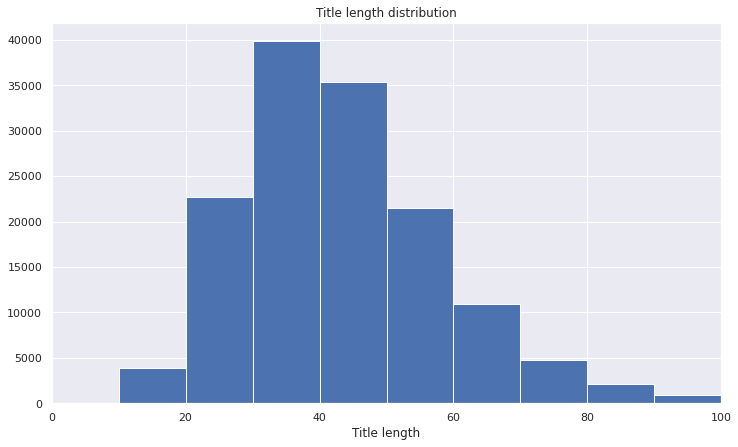

In [360]:
plt.figure(figsize=(12,7))
plt.hist(stack['Title_length'], bins=[i for i in range(0,140,10)])
plt.xlim(0,100)
plt.xlabel('Title length')
plt.title('Title length distribution')

**Tags count vs body length**

Text(0, 0.5, 'body length')

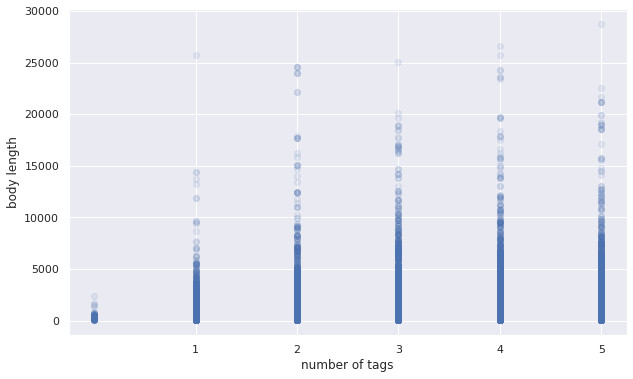

In [361]:
plt.figure(figsize=(10,6))
plt.scatter(x=stack['Tags_count'], y=stack['Body_length'], alpha=0.1)
plt.xticks([1,2,3,4,5])
plt.xlabel('number of tags')
plt.ylabel('body length')

There is no clear relation between the number of tags and the length of the body.

## Body + Title

In [365]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [366]:
R_patterns = [
   (r'won\'t', 'will not'),
   (r'can\'t', 'cannot'),
   (r'[Ii]\'m', 'i am'),
   (r'(\w+)\'ll', '\g<1> will'),
   (r'(\w+)n\'t', '\g<1> not'),
   (r'(\w+)\'ve', '\g<1> have'),
   (r'(\w+)\'s', '\g<1> is'),
   (r'(\w+)\'re', '\g<1> are'),
]

class REReplacer(object):
   def __init__(self, pattern = R_patterns):
      self.pattern = [(re.compile(regex), repl) for (regex, repl) in pattern]
   def replace(self, text):
      s = text
      for (pattern, repl) in self.pattern:
         s = re.sub(pattern, repl, s)
      return s

In [363]:
stack['Body'][:5]

0    <p>Can linq somehow be used to find the index ...
1    <p>I want to create my Rails application with ...
2    <p>What are the libraries that support XPath? ...
3    <p>I'm writing a web page in ASP.NET. I have s...
4    <p>So I'm using an app that stores images heav...
Name: Body, dtype: object

In [477]:
def clean_body_title(text):
  # parse html
  soup = BeautifulSoup(text, features="html.parser")

  # kill all script and style elements
  for script in soup(["script", "style"]):
      script.extract()    # rip it out

  # get text
  text = soup.get_text()

  # remove url
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

  # convert to lowercase
  text = text.lower()

  # remove contractions
  rep_word = REReplacer()
  text = rep_word.replace(text)
  
  # split into words
  tokens = mwtokenizer.tokenize(word_tokenize(text))

  # remove punctuation from each word
  table = str.maketrans('', '', string.punctuation)
  stripped = []
  for w in tokens:
    if w in set(single_word_top_400_tags):
      stripped.append(w)
    else:
      stripped.append(w.translate(table))


  # remove remaining tokens that are not alphabetic
  words = [word for word in stripped if (any(chr.isdigit() for chr in word)==False)]

  # filter out stop words
  stop_words = set(stopwords.words('english'))
  words = [w for w in words if not w in stop_words]
  words = [w for w in words if w != '']

  # lemmatization except top 400 tags
  wordnet_lemmatizer = WordNetLemmatizer()
  words_lemma = []
  for w in words:
    if w in set(single_word_top_400_tags):
      words_lemma.append(w)
    else:
      words_lemma.append(wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)))

  return words_lemma

In [473]:
clean_body_title('c# c++ asp.net .net on1 ruby  cats on rails android studio.')

['c#', 'c++', 'asp.net', '.net', 'ruby', 'cat', 'rails', 'android', 'studio']

In [476]:
clean_body_title('I am using Python\'s NLTK library to tokenize my sentences.If my code')

['use', 'python', 'nltk', 'library', 'tokenize', 'sentencesif', 'code']

**Clean body and title using the text processing techniques stated above.**

In [478]:
stack['Body_cleaned'] = stack['Body'].apply(clean_body_title)

1771 s

In [479]:
stack['Title_cleaned'] = stack['Title'].apply(clean_body_title)

In [480]:
stack.head()

,id,AcceptedAnswerId,Score,ViewCount,Body,Title,Tags,AnswerCount,FavoriteCount,Tags_c,Tags_count,Body_length,Title_length,Body_cleaned,Title_cleaned
0,1764970,1770683.0,113,143104,<p>Can linq somehow be used to find the index ...,Find index of a value in an array,<c#><arrays><linq>,8,17.0,"[c#, arrays, linq]",3,208,26,"[linq, somehow, use, find, index, value, array...","[find, index, value, array]"
1,3585,3601.0,132,147579,<p>I want to create my Rails application with ...,Create a new Ruby on Rails application using M...,<mysql><ruby-on-rails><ruby>,19,44.0,"[mysql, ruby rails, ruby]",3,133,57,"[want, create, rails, application, mysql, like...","[create, new, ruby, rails, application, use, m..."
2,8692,NaN,229,296787,<p>What are the libraries that support XPath? ...,How to use XPath in Python?,<python><xml><dom><xpath><python-2.x>,12,74.0,"[python, xml, dom, xpath, python]",5,108,22,"[library, support, xpath, full, implementation...","[use, xpath, python]"
3,3713,3777.0,140,284586,<p>I'm writing a web page in ASP.NET. I have s...,Call ASP.NET function from JavaScript?,<javascript><c#><asp.net><onclick>,20,41.0,"[javascript, c#, asp.net, onclick]",4,168,34,"[write, web, page, asp.net, javascript, code, ...","[call, asp.net, function, javascript]"
4,3748,NaN,415,655648,<p>So I'm using an app that stores images heav...,Storing Images in DB - Yea or Nay?,<database><image><theory><storage><blob>,56,880.0,"[database, image, theory, storage, blob]",5,189,27,"[use, app, store, image, heavily, db, outlook,...","[store, image, db, yea, nay]"


In [482]:
body = {}
for i in range(len(stack)):
  for j in range(len(stack['Body_cleaned'][i])):
    if stack['Body_cleaned'][i][j] in body.keys():
      body[stack['Body_cleaned'][i][j]] += 1
    else:
      body[stack['Body_cleaned'][i][j]] = 1

In [483]:
title = {}
for i in range(len(stack)):
  for j in range(len(stack['Title_cleaned'][i])):
    if stack['Title_cleaned'][i][j] in title.keys():
      title[stack['Title_cleaned'][i][j]] += 1
    else:
      title[stack['Title_cleaned'][i][j]] = 1

**Count number of unique words in title, body and tags.**

In [484]:
len(title), len(body), len(tags)

(24781, 264895, 12932)

In [485]:
title_sorted = {k: v for k, v in sorted(title.items(), key=lambda item: item[1])}

Text(0.5, 1.0, 'Top 20 words in Title')

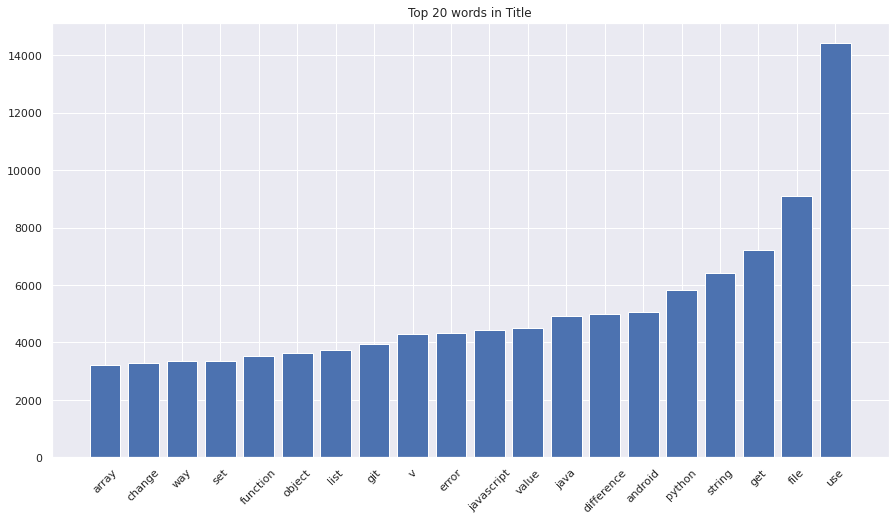

In [486]:
plt.figure(figsize=(15, 8)) 
plt.bar(dict(list(title_sorted.items())[-20:]).keys(), dict(list(title_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 words in Title')

In [487]:
body_sorted = {k: v for k, v in sorted(body.items(), key=lambda item: item[1])}
list(body_sorted.items())[-20:]

[('one', 33410),
 ('android', 34398),
 ('value', 35349),
 ('name', 35438),
 ('return', 37075),
 ('function', 39315),
 ('would', 39414),
 ('new', 41540),
 ('way', 41968),
 ('string', 44108),
 ('work', 44108),
 ('error', 44278),
 ('want', 45003),
 ('code', 45728),
 ('class', 46472),
 ('try', 47207),
 ('like', 57523),
 ('file', 59673),
 ('get', 61675),
 ('use', 114916)]

Text(0.5, 1.0, 'Top 20 words in Body')

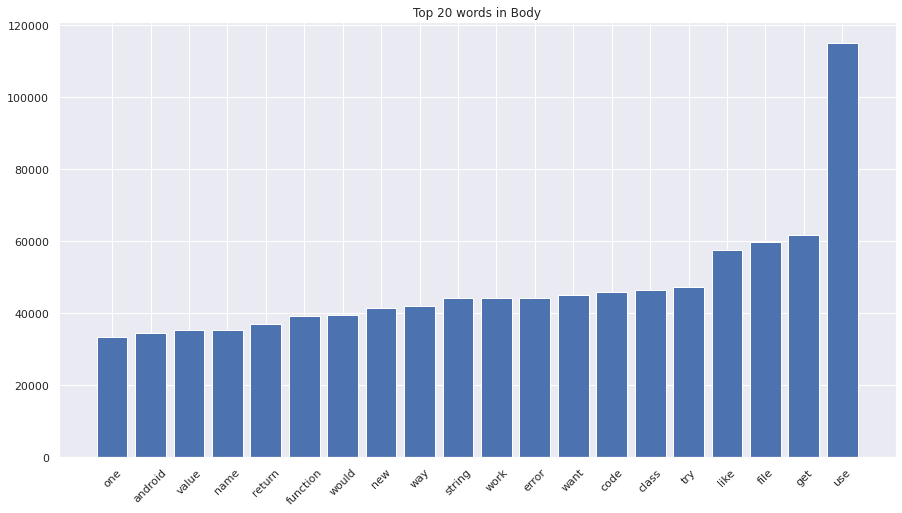

In [488]:
plt.figure(figsize=(15, 8)) 
plt.bar(dict(list(body_sorted.items())[-20:]).keys(), dict(list(body_sorted.items())[-20:]).values())
plt.xticks(rotation=45)
plt.title('Top 20 words in Body')

In [490]:
stack[['Body', 'Title', 'Tags', 'Tags_c', 'Body_cleaned', 'Title_cleaned']]

,Body,Title,Tags,Tags_c,Body_cleaned,Title_cleaned
0,<p>Can linq somehow be used to find the index ...,Find index of a value in an array,<c#><arrays><linq>,"[c#, arrays, linq]","[linq, somehow, use, find, index, value, array...","[find, index, value, array]"
1,<p>I want to create my Rails application with ...,Create a new Ruby on Rails application using M...,<mysql><ruby-on-rails><ruby>,"[mysql, ruby rails, ruby]","[want, create, rails, application, mysql, like...","[create, new, ruby, rails, application, use, m..."
2,<p>What are the libraries that support XPath? ...,How to use XPath in Python?,<python><xml><dom><xpath><python-2.x>,"[python, xml, dom, xpath, python]","[library, support, xpath, full, implementation...","[use, xpath, python]"
3,<p>I'm writing a web page in ASP.NET. I have s...,Call ASP.NET function from JavaScript?,<javascript><c#><asp.net><onclick>,"[javascript, c#, asp.net, onclick]","[write, web, page, asp.net, javascript, code, ...","[call, asp.net, function, javascript]"
4,<p>So I'm using an app that stores images heav...,Storing Images in DB - Yea or Nay?,<database><image><theory><storage><blob>,"[database, image, theory, storage, blob]","[use, app, store, image, heavily, db, outlook,...","[store, image, db, yea, nay]"
...,...,...,...,...,...,...
142887,"<p>So <a href=""http://api.jquery.com/category/...",.prop() vs .attr(),<javascript><jquery><dom><attr><prop>,"[javascript, jquery, dom, attr, prop]","[jquery, new, function, prop, selector, click,...","[prop, v, attr]"
142888,"<p>I used to use CShell (<a href=""/questions/t...",Make a Bash alias that takes a parameter?,<bash><alias>,"[bash, alias]","[use, use, cshell, csh, let, make, alias, take...","[make, bash, alias, take, parameter]"
142889,<p>I currently have three modified files in my...,Hard reset of a single file,<git>,[git],"[currently, three, modify, file, work, directo...","[hard, reset, single, file]"
142890,<p>So I have a Nginx running inside a docker c...,"From inside of a Docker container, how do I co...",<nginx><docker><reverse-proxy><docker-networking>,"[nginx, docker, reverse proxy, docker networking]","[nginx, run, inside, docker, container, mysql,...","[inside, docker, container, connect, localhost..."


Concatenate body and title

In [491]:
stack['Body_title_cleaned'] = stack['Body_cleaned'] + stack['Title_cleaned']

Count in how many documents each word appears

In [492]:
count={}
for i in range(len(stack)):
  for w in set(stack['Body_title_cleaned'][i]):
    if w in count:
      count[w]+=1
    else:
      count[w]=1

In [1]:
title_body_count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}
list(title_body_count.items())[-30:]

NameError: ignored

In [497]:
stack_cleaned = stack[['Body', 'Title', 'Tags', 'Tags_c', 'Body_cleaned', 'Title_cleaned', 'Body_title_cleaned']]
stack_cleaned.head()

,Body,Title,Tags,Tags_c,Body_cleaned,Title_cleaned,Body_title_cleaned
0,<p>Can linq somehow be used to find the index ...,Find index of a value in an array,<c#><arrays><linq>,"[c#, arrays, linq]","[linq, somehow, use, find, index, value, array...","[find, index, value, array]","[linq, somehow, use, find, index, value, array..."
1,<p>I want to create my Rails application with ...,Create a new Ruby on Rails application using M...,<mysql><ruby-on-rails><ruby>,"[mysql, ruby rails, ruby]","[want, create, rails, application, mysql, like...","[create, new, ruby, rails, application, use, m...","[want, create, rails, application, mysql, like..."
2,<p>What are the libraries that support XPath? ...,How to use XPath in Python?,<python><xml><dom><xpath><python-2.x>,"[python, xml, dom, xpath, python]","[library, support, xpath, full, implementation...","[use, xpath, python]","[library, support, xpath, full, implementation..."
3,<p>I'm writing a web page in ASP.NET. I have s...,Call ASP.NET function from JavaScript?,<javascript><c#><asp.net><onclick>,"[javascript, c#, asp.net, onclick]","[write, web, page, asp.net, javascript, code, ...","[call, asp.net, function, javascript]","[write, web, page, asp.net, javascript, code, ..."
4,<p>So I'm using an app that stores images heav...,Storing Images in DB - Yea or Nay?,<database><image><theory><storage><blob>,"[database, image, theory, storage, blob]","[use, app, store, image, heavily, db, outlook,...","[store, image, db, yea, nay]","[use, app, store, image, heavily, db, outlook,..."


# Export the cleaned data

Save the dataframe into a csv file.

In [501]:
stack['Tags_c']

0                                        [c#, arrays, linq]
1                                 [mysql, ruby rails, ruby]
2                         [python, xml, dom, xpath, python]
3                        [javascript, c#, asp.net, onclick]
4                  [database, image, theory, storage, blob]
                                ...                        
142887                [javascript, jquery, dom, attr, prop]
142888                                        [bash, alias]
142889                                                [git]
142890    [nginx, docker, reverse proxy, docker networking]
142891                    [java, macos, java, installation]
Name: Tags_c, Length: 142892, dtype: object

In [498]:
pd.Series(top_400_tags).to_csv('/top_400_tags.csv')

In [500]:
pd.Series(single_word_top_400_tags).to_csv('/single_word_top_400_tags.csv')

In [499]:
stack_cleaned.to_csv('/stack_cleaned.csv')